In [2]:
#2 cách : 1 cách bằng công thức , 1 cách bằng thư viện
import numpy as np # khai báo numpy
import matplotlib.pyplot as plt # khai báo thư viện vẽ đồ thị
# height (cm) để ma trận chuyển vị dễ tính theo ct
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg) (1, 13) ->(13,1)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

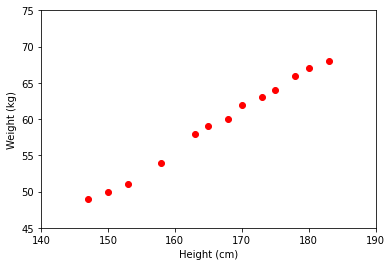

In [3]:
# Visualize data
plt.plot(X, y, 'ro') # vẽ điểm tọa độ có màu đỏ tô tròn (red dot)
plt.axis([140, 190, 45, 75])# bảng kéo từ trục hoành 140-190 và trục tung 45-75
plt.xlabel('Height (cm)')# tên của trục x
plt.ylabel('Weight (kg)')##tên của trục y
plt.show() # vẽ biểu đồ

In [5]:
# Building Xbar
#one là ma trận chỉ toàn 1, vì lấy argument là X.shape[0], 1 nên sẽ có X.shape[0] dòng số 1.
one = np.ones((X.shape[0], 1))
#np.concatenate((one,X), axis = 1) có nghĩa là bạn ghép hai ma trận vào thành một ma trận mới, với X ở cột thứ 2 do axis = 1
Xbar = np.concatenate((one, X), axis = 1)
print(Xbar)
# Tính toán cân nặng dựa theo công thức Xbar.Xbar.T
A = np.dot(Xbar.T, Xbar) #theo công thức nhân 2 ma trận
b = np.dot(Xbar.T, y)  #theo công thức nhân tính Xbar.y
w = np.dot(np.linalg.pinv(A), b)# linalg.pinv là ma trận nghịch đảo
#Ma trận w là ma trận [2x1] có nghĩa là 2 hàng và 1 cột.
print('w = ', w) #

[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]
w =  [[-33.73541021]
 [  0.55920496]]


In [7]:
# Preparing the fitting line CHSU Ý :vì w chỉ là 1 ma trận có 1 cột
w_0 = w[0][0] # w_0
w_1 = w[1][0] # w_1
#chia đều: lấy 2 giá trị giữa 145=>185 ta được mảng 1c gồm 145 và 185
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0
print(x0,y0)

[145. 185.] [47.34930928 69.71750775]


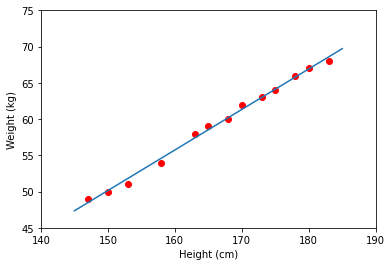

In [8]:
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')     # data
plt.plot(x0, y0)               # nối đường thẳng sau khi có x0, y0
plt.axis([140, 190, 45, 75]) # bảng kéo từ trục hoành 140-190 và trục tung 45-75
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [9]:
y1 = w_1*155 + w_0 # lấy ngẫu nhiên giá trị 155 và 160 để dùng làm tập kiểm thử
y2 = w_1*160 + w_0
print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


In [10]:
from sklearn import datasets, linear_model
# tính w theo cách sử dụng thư viện sklearn
# fit the model by Linear Regression
# linear...regression: được sử dụng để thực hiện hồi quy tuyến tính và đa thức để đưa ra kết quả dự đoán hợp lý
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)# không đổi chỗ 2 giá trị này vì hàm là cố định
# Compare two results
# coefficient: hệ số ước lượng nên hàm regr.coef sẽ tính ra kết quả của công thức linear regr.
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]
